# Bandit Problem

## UCB algorithm

USB algorithm evaluates arm A as follows:

$$\hat{\mu_{i}} + \sqrt{\frac{log(t)}{2N_{i}(t)}}$$

## implement 

In [46]:
%matplotlib inline 
import sys
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

### Bandit probelm setting: rewords folloing Bernoulli distributions 

In [24]:
class Bandit(object):
    def __init__(self, prob):
        """
        Bandit
        :param prob: probability of 1 reward
        :return: None
        """
        self.prob = prob

    def get_reward(self):
        """
        calculate reward
        :return: reward
        """
        return np.random.binomial(1, self.prob)


class BanditProblem(object):
    def __init__(self, probs):
        """
        Bandit problem class
        :param probs: list of probability of 1 reward
        :return: None
        """
        self.number = len(probs)
        self.bandits = [Bandit(prob) for prob in probs]

### UCB Algorithms

In [47]:
class UCBSolver(object):
    """
    ref: http://nonbiri-tereka.hatenablog.com/entry/2016/07/04/073151
    """

    def solve(self, bandits, times=10000):
        """
        solve the bandit problem
        :param bandits: bandits
        :param times: times(e_greedy estimation)
        :return: None
        """
        total_rewards = 0.0
        count = 0
        average_score = []
        selected_indexs = []
        scores = [0.0 for number in range(bandits.number)]
        counter = [0.0 for number in range(bandits.number)]

        for time in range(times):
            # select
            selected_index = self.select_action(scores, counter)
            # get score of selected bandits
            score = bandits.bandits[selected_index].get_reward()
            # update counter and scores
            counter[selected_index] += 1
            scores[selected_index] = (scores[selected_index] * (counter[selected_index] - 1) + score) / counter[selected_index]
            total_rewards += score
            selected_indexs.append(selected_index)

            count += 1
            average_score.append(total_rewards / count)

        return average_score, counter, scores

    def select_action(self, scores, counter):
        return np.argmax(scores + np.sqrt(np.log(np.sum(counter)+ sys.float_info.epsilon) / 2* np.array(counter)))


### problem setting & test

In [92]:
probs = [0.1,  0.05,  0.05,  0.05,  0.02,  0.02,  0.02,  0.01,  0.01,  0.01]
random.shuffle(probs)
bandits = BanditProblem(probs)
probs

[0.01, 0.1, 0.02, 0.02, 0.05, 0.05, 0.01, 0.05, 0.01, 0.02]

In [94]:
# check get reword 
_sum = 0
for i in range(1000):
    _sum += bandits.bandits[1].get_reward()
print(_sum)

94


In [95]:
solver = UCBSolver()

In [96]:
average_score, counter, scores = solver.solve(bandits, times=10000)

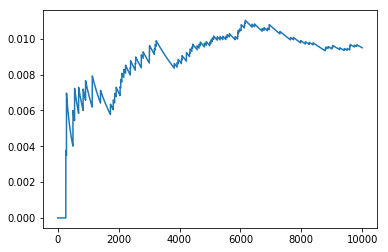

In [97]:
plt.plot(range(len(average_score)), average_score)

### 100 independent trials

In [98]:
list_of_average_score = []
list_of_counter = []
list_of_scores = []
for i in range(100):
    average_score, counter, scores = solver.solve(bandits, times=10000)
    list_of_average_score.append(average_score)
    list_of_counter.append(counter)
    list_of_scores.append(scores)


In [99]:
final_average_score = np.mean(np.array(list_of_average_score),axis=0)
final_counter = np.mean(np.array(list_of_counter),axis=0)
final_scores = np.mean(np.array(list_of_scores),axis=0)

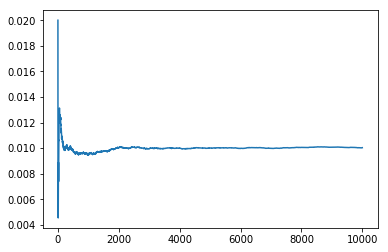

In [100]:
plt.plot(range(len(final_average_score)), final_average_score)

In [101]:
final_counter

array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
           0.,     0.])

In [102]:
final_scores

array([0.010036, 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      ])